In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.fftpack
import scipy as sp

In [3]:
face_data = pd.read_csv("BIRAFFE-photo/SUB1107-Face.csv", sep=";", 
                        # parse_dates=["GAME-TIMESTAMP"]
                        )
freud_face_data = face_data[face_data['COND'] == "freud"]
freud_face_data = freud_face_data.rename(columns={"GAME-TIMESTAMP": "Timestamp"})
freud_face_data = freud_face_data.round({'Timestamp': 0})
freud_face_data.head()

,COND,Timestamp,PICTURE-TIMESTAMP,IADS-ID,IAPS-ID,ANGER,CONTEMPT,DISGUST,FEAR,HAPPINESS,NEUTRAL,SADNESS,SURPRISE
1140,freud,1.555654e+09,NaN,NaN,NaN,0.0,0.000,0.0,0.0,0.0,0.991,0.008,0.0
1141,freud,1.555654e+09,NaN,NaN,NaN,0.0,0.000,0.0,0.0,0.0,0.991,0.009,0.0
1142,freud,1.555654e+09,NaN,NaN,NaN,0.0,0.001,0.0,0.0,0.0,0.963,0.036,0.0
1143,freud,1.555654e+09,NaN,NaN,NaN,0.0,0.000,0.0,0.0,0.0,0.983,0.017,0.0
1144,freud,1.555654e+09,NaN,NaN,NaN,0.0,0.000,0.0,0.0,0.0,0.986,0.014,0.0


In [10]:
biosig_data = pd.read_csv("BIRAFFE-biosigs/SUB1107-BioSigs.csv", sep=";", 
                        # parse_dates=["GAME-TIMESTAMP"]
                        )
biosig_data = biosig_data.rename(columns={"TIMESTAMP": "Timestamp"})
biosig_data = biosig_data.round({'Timestamp': 0})
biosig_data.head()

,Timestamp,ECG,EDA
0,1.555651e+09,-0.042122,NaN
1,1.555651e+09,-0.048017,NaN
2,1.555651e+09,-0.053935,NaN
3,1.555651e+09,-0.059849,NaN
4,1.555651e+09,-0.065734,NaN


In [15]:
# face_game_data = game_data.join(freud_face_data, on="Timestamp", rsuffix="_face")
# face_game_data.head(4)

,Timestamp,Game,CountDown,ChangeTo,Key,Player,StartingValue,Slider,Alert,Time,...,IADS-ID,IAPS-ID,ANGER,CONTEMPT,DISGUST,FEAR,HAPPINESS,NEUTRAL,SADNESS,SURPRISE
0,1.555654e+09,Introduction,Text,Game will start in: 28s,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.555654e+09,Introduction,Text,Game will start in: 27s,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.555654e+09,Introduction,Text,Game will start in: 26s,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.555654e+09,Introduction,Text,Game will start in: 25s,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.555654e+09,Introduction,Text,Game will start in: 24s,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1.555654e+09,Introduction,Text,Game will start in: 23s,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1.555654e+09,Introduction,Text,Game will start in: 22s,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1.555654e+09,Introduction,Text,Game will start in: 21s,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1.555654e+09,Introduction,Text,Game will start in: 20s,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1.555654e+09,Introduction,Text,Game will start in: 19s,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:

combined_data = pd.merge(biosig_data, freud_face_data,
                  left_on='Timestamp',
                  right_on='Timestamp',
                  how='inner')

combined_data.head(4)

,Timestamp,ECG,EDA,COND,PICTURE-TIMESTAMP,IADS-ID,IAPS-ID,ANGER,CONTEMPT,DISGUST,FEAR,HAPPINESS,NEUTRAL,SADNESS,SURPRISE
0,1.555654e+09,0.069690,7.763672,freud,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.991,0.008,0.0
1,1.555654e+09,0.071678,7.763672,freud,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.991,0.008,0.0
2,1.555654e+09,0.073626,7.763672,freud,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.991,0.008,0.0
3,1.555654e+09,0.075527,7.763672,freud,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.991,0.008,0.0


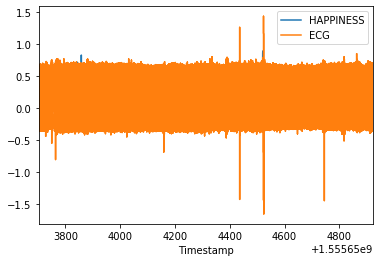

In [12]:
combined_data.plot(x='Timestamp', y=["HAPPINESS", "ECG"])

In [13]:
# face_game_data[face_game_data['Joystick'] == "Left"].plot(x='Timestamp', y='Horizontal')

ecg_data = np.genfromtxt('BIRAFFE-biosigs/SUB1107-BioSigs.csv', delimiter=';')
ecg_data = ecg_data[~np.isnan(ecg_data).any(axis=1)]
timestamps = ecg_data[:, 0]
ecg_data = ecg_data[:, 1]

/Users/damianwarzecha/Studia/psi/projekt/venv/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


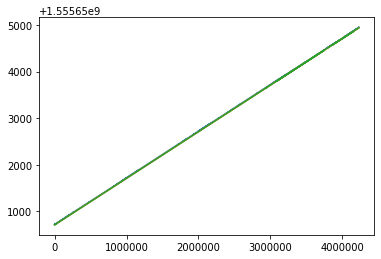

In [11]:
freq = np.fft.fft(ecg_data)

plt.plot(freq)

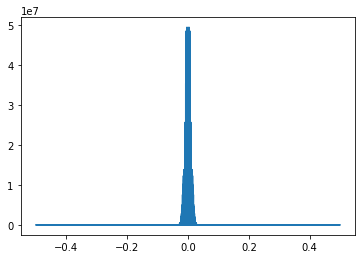

In [21]:
# sample spacing
T = 1.0 / 1000.0
x = timestamps
y = ecg_data
N = timestamps.shape[0]


ft = np.fft.fft(y)
freq = np.fft.fftfreq(N)
plt.plot(freq, ft.real**2 + ft.imag**2)
plt.show()

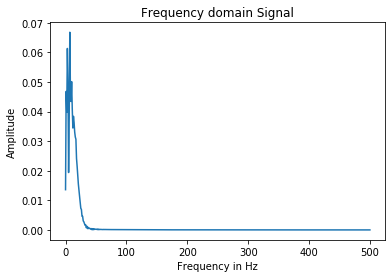

In [28]:
from scipy.fftpack import fft

ecg_sample = ecg_data[0:1000]
time = np.linspace(0, 1, 1000)

sample_rate = 1000
N = time.shape[0]

frequency = np.linspace (0.0, 500, int (N/2))

freq_data = fft(ecg_sample)
y = 2/N * np.abs (freq_data [0:np.int (N/2)])

plt.plot(frequency, y)
plt.title('Frequency domain Signal')
plt.xlabel('Frequency in Hz')
plt.ylabel("Amplitude")
plt.show()

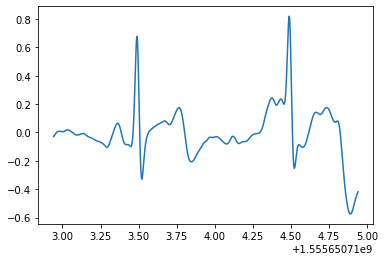

In [29]:
plt.plot(timestamps[0:2000], ecg_data[0:2000])